#🛠️ Preparação dos Dados

In [8]:
# --- CÉLULA 1: PREPARAÇÃO AVANÇADA DOS DADOS PARA MACHINE LEARNING ---

# Instalação de Bibliotecas Adicionais
# A biblioteca 'imbalanced-learn' contém o SMOTE e não vem pré-instalada no Colab.

!pip install -q imbalanced-learn

# Importação das Bibliotecas
import pandas as pd
import numpy as np
import warnings
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# Ignorando avisos que não são erros para manter a saída limpa
warnings.filterwarnings('ignore', category=FutureWarning)

print("🚀 Iniciando a preparação dos dados para a modelagem...")

# 1. Carregamento dos Dados Tratados
url_dados_tratados = "https://raw.githubusercontent.com/PhilipeOliveiraS/ONE---Oracle-Next-Education---Alura/refs/heads/main/Python/Estat%C3%ADstica%20e%20Machine%20Learning/Desafio_TelecomX_BR_2_ML/dados_tratados.csv"
try:
    df_clientes = pd.read_csv(url_dados_tratados)
    print("\n✅ Dados carregados com sucesso do GitHub!")
except Exception as e:
    print(f"\n❌ Erro ao carregar os dados: {e}")
    df_clientes = pd.DataFrame()

if not df_clientes.empty:

    # 2. Eliminação de Colunas Desnecessárias
    if 'customerID' in df_clientes.columns:
        df_clientes.drop('customerID', axis=1, inplace=True)
    print("\n✅ Coluna 'customerID' removida.")

    # 3. Transformação de Variáveis Categóricas (One-Hot Encoding)
    colunas_categoricas = df_clientes.select_dtypes(include=['object']).columns.tolist()

    # Garantir que 'Churn' não seja codificado se por acaso for do tipo object
    if 'Churn' in colunas_categoricas:
        colunas_categoricas.remove('Churn')

    encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    dados_encoded = encoder.fit_transform(df_clientes[colunas_categoricas])
    df_encoded = pd.DataFrame(dados_encoded, columns=encoder.get_feature_names_out(colunas_categoricas))

    df_clientes_numerico = df_clientes.drop(colunas_categoricas, axis=1).reset_index(drop=True)
    df_final = pd.concat([df_clientes_numerico, df_encoded], axis=1)
    print("\n✅ Variáveis categóricas transformadas com OneHotEncoder.")

    # 4. Remoção de Alvos Ausentes (NaN)
    df_final.dropna(subset=['Churn'], inplace=True)
    print("\n✅ Linhas com valor de 'Churn' ausente foram removidas.")

    # 5. Separação das Variáveis (Features e Alvo)
    X = df_final.drop('Churn', axis=1)
    y = df_final['Churn']
    print("\n✅ Dados separados em features (X) e alvo (y).")

    # [NOVA ETAPA] 6. Verificação do Desbalanceamento (Conforme solicitado nas instruções)
    print("\n📊 Proporção das classes ANTES do balanceamento:")
    print(y.value_counts(normalize=True))

    # 7. Balanceamento dos Dados com SMOTE
    print("\n🔄 Balanceando os dados com SMOTE...")
    smote = SMOTE(random_state=42)
    X_balanceado, y_balanceado = smote.fit_resample(X, y)

    df_balanceado = pd.DataFrame(X_balanceado, columns=X.columns)
    df_balanceado['Churn'] = y_balanceado

    print(" -> Dados balanceados com sucesso.")

    # [NOVA ETAPA] 8. Verificação Pós-Balanceamento
    print("\n📊 Proporção das classes DEPOIS do balanceamento:")
    print(df_balanceado['Churn'].value_counts(normalize=True))

    # 9. Verificação Final
    print("\n✅ Preparação concluída! O DataFrame 'df_balanceado' está pronto.")
    print("\nNomes das colunas disponíveis: ", df_balanceado.columns.tolist())
    display(df_balanceado.head())

🚀 Iniciando a preparação dos dados para a modelagem...

✅ Dados carregados com sucesso do GitHub!

✅ Coluna 'customerID' removida.

✅ Variáveis categóricas transformadas com OneHotEncoder.

✅ Linhas com valor de 'Churn' ausente foram removidas.

✅ Dados separados em features (X) e alvo (y).

📊 Proporção das classes ANTES do balanceamento:
Churn
0.0    0.73463
1.0    0.26537
Name: proportion, dtype: float64

🔄 Balanceando os dados com SMOTE...
 -> Dados balanceados com sucesso.

📊 Proporção das classes DEPOIS do balanceamento:
Churn
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

✅ Preparação concluída! O DataFrame 'df_balanceado' está pronto.

Nomes das colunas disponíveis:  ['SeniorCitizen', 'Partner', 'Dependents', 'customer.tenure', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Contas_Diarias', 'gender_Male', 'MultipleLines_No phone service', 'Multi

,SeniorCitizen,Partner,Dependents,customer.tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,1,9,1,0,1,0,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0,0,0,9,1,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,4,1,0,0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,1,1,0,13,1,0,1,1,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1,1,0,3,1,0,0,0,1,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


# 🎯 Correlação e Seleção de Variáveis

🚀 Iniciando a análise de correlação...

✅[1/3]Gerando a Matriz de Correlação...


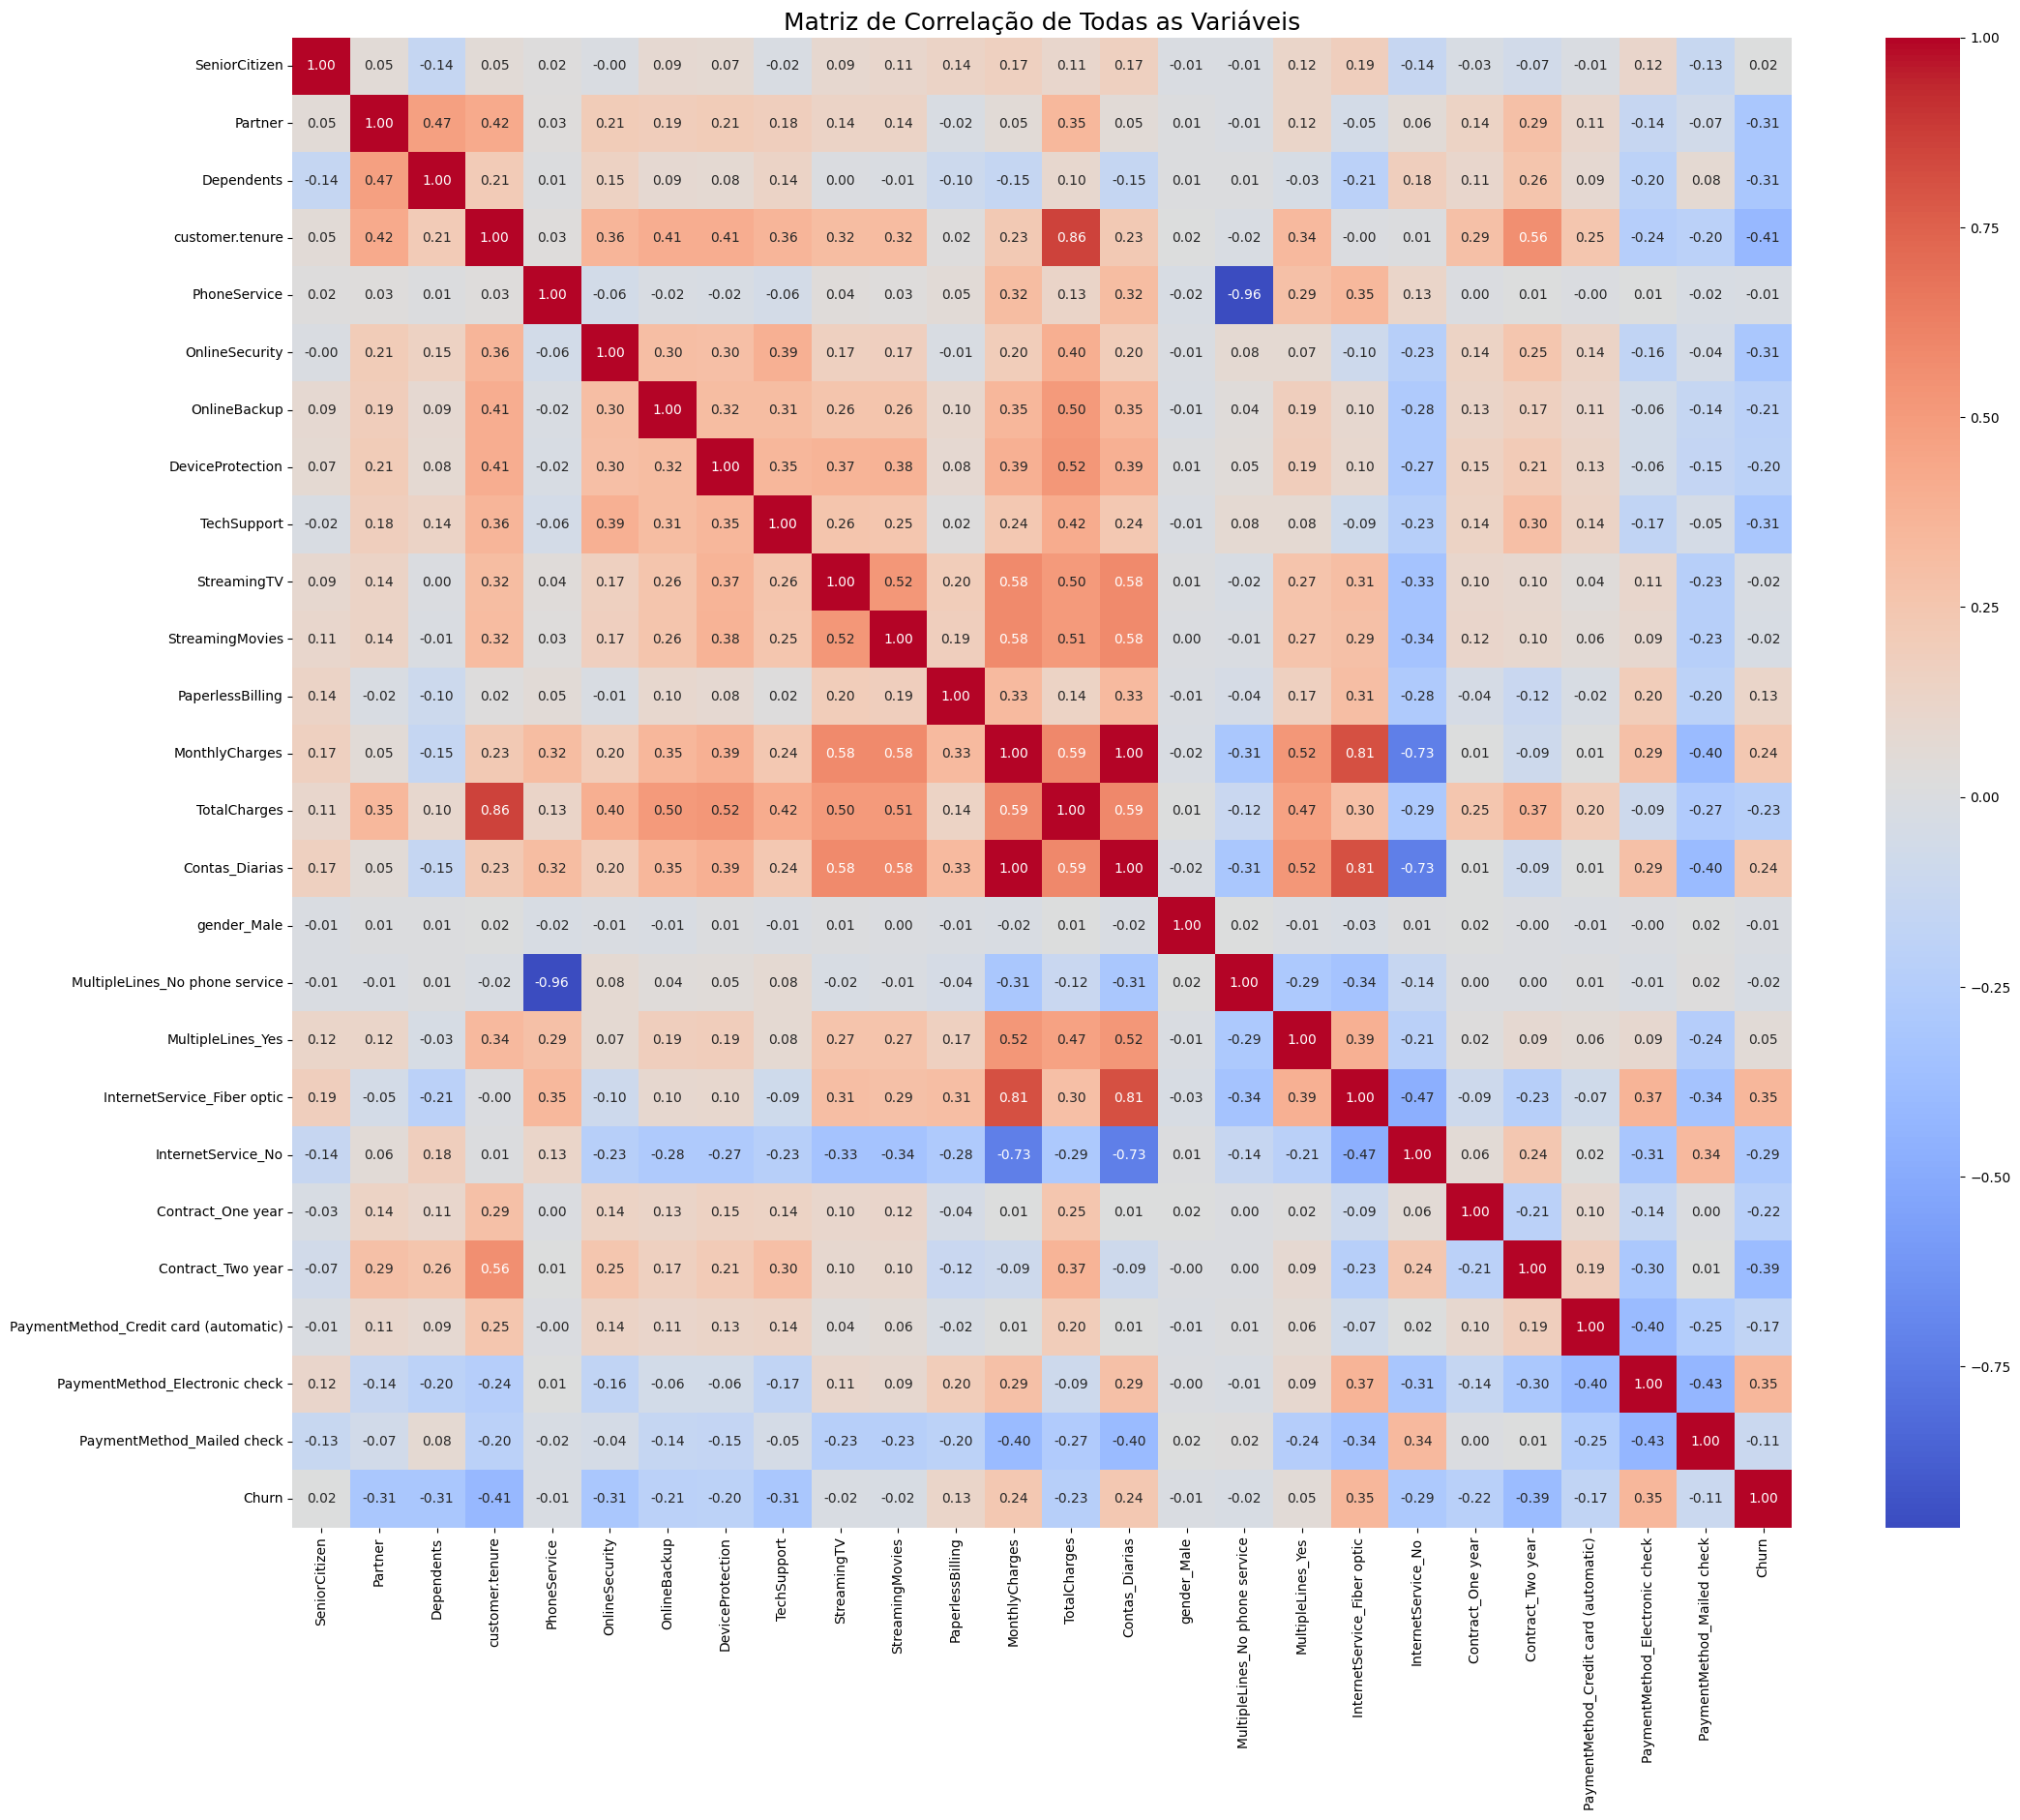


✅[2/3]Análise focada na correlação com 'Churn':


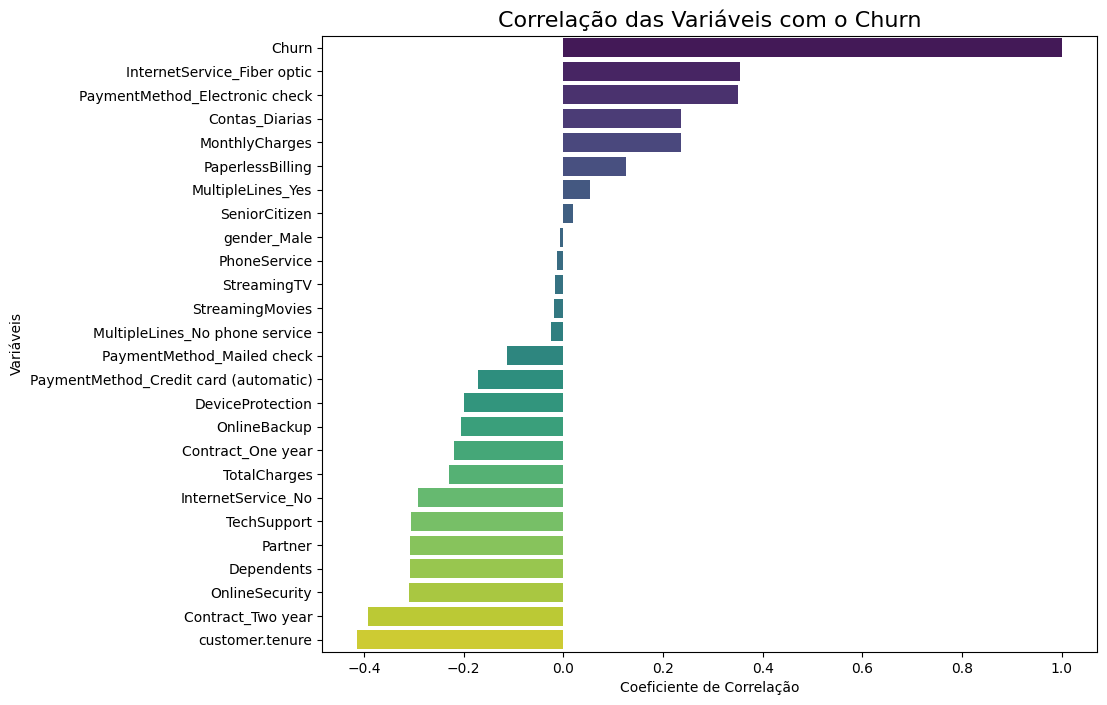


Aprofundando a análise em variáveis chave...


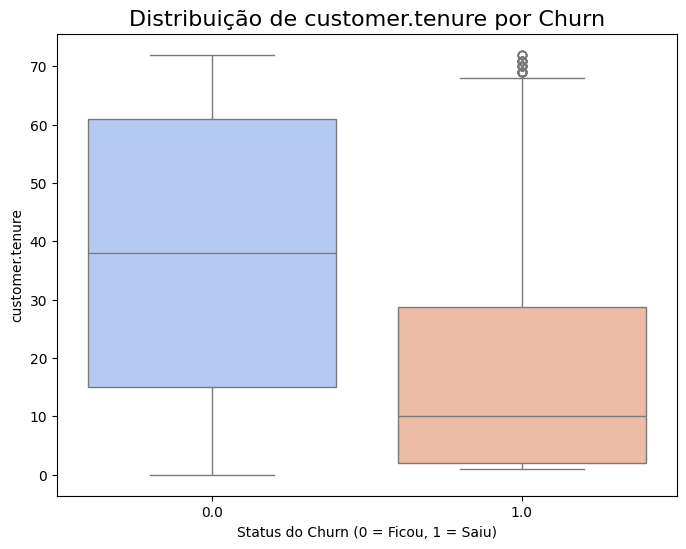

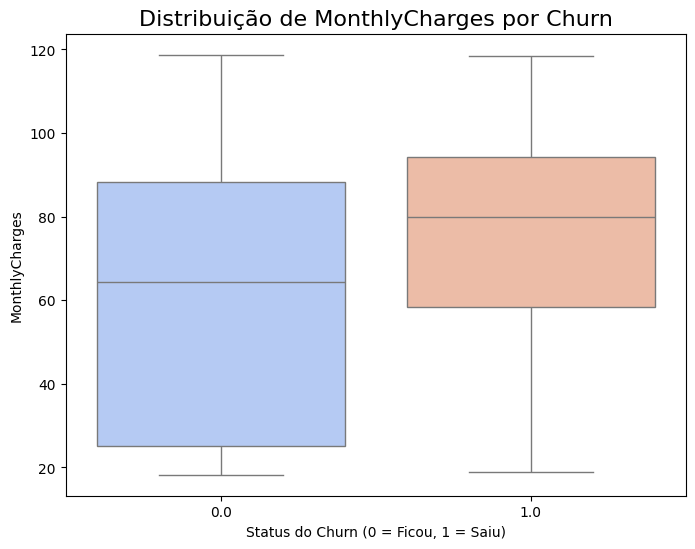

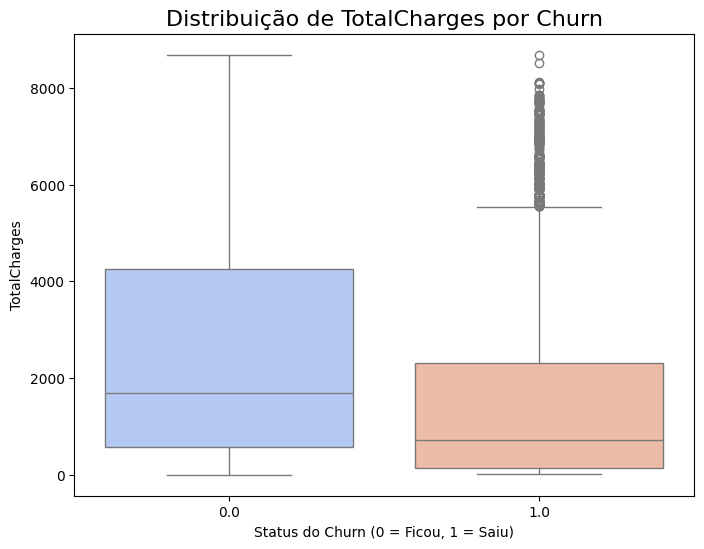


✅[3/3] Análise de correlação e seleção de variáveis concluída!
 -> Insights gerados sobre as variáveis mais impactantes no Churn.


In [9]:
# --- CÉLULA 2: CORRELAÇÃO E SELEÇÃO DE VARIÁVEIS ---

import seaborn as sns
import matplotlib.pyplot as plt

print("🚀 Iniciando a análise de correlação...")

# 1. Matriz de Correlação
print("\n✅[1/3]Gerando a Matriz de Correlação...")
plt.figure(figsize=(25, 20))
sns.heatmap(df_balanceado.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação de Todas as Variáveis', fontsize=18)
plt.show()

# 2. Correlação com a Variável Alvo
print("\n✅[2/3]Análise focada na correlação com 'Churn':")
# Garante que a correlação seja calculada apenas com tipos numéricos
corr_churn = df_balanceado.corr(numeric_only=True)['Churn'].sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=corr_churn.values, y=corr_churn.index, palette='viridis', orient='h')
plt.title('Correlação das Variáveis com o Churn', fontsize=16)
plt.xlabel('Coeficiente de Correlação')
plt.ylabel('Variáveis')
plt.show()

# 3. Análise de Variáveis Específicas
print("\nAprofundando a análise em variáveis chave...")

colunas_numericas_principais = ['customer.tenure', 'MonthlyCharges', 'TotalCharges']

for coluna in colunas_numericas_principais:
    # Verifica se a coluna existe antes de tentar plotar, como uma boa prática
    if coluna in df_balanceado.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='Churn', y=coluna, data=df_balanceado, palette='coolwarm')
        plt.title(f'Distribuição de {coluna} por Churn', fontsize=16)
        plt.xlabel('Status do Churn (0 = Ficou, 1 = Saiu)')
        plt.ylabel(coluna)
        plt.show()
    else:
        print(f"AVISO: A coluna '{coluna}' não foi encontrada no DataFrame e não será plotada.")


print("\n✅[3/3] Análise de correlação e seleção de variáveis concluída!")
print(" -> Insights gerados sobre as variáveis mais impactantes no Churn.")

# 🤖 Modelagem Preditiva

🚀 Iniciando a etapa de Modelagem Preditiva...

✅ Dados divididos em treino (8278 amostras) e teste (2070 amostras).

--- Treinando Modelo 1: Regressão Logística ---

--- Treinando Modelo 2: Random Forest ---

--- Treinando Modelo 3: LightGBM ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4139, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2576
[LightGBM] [Info] Number of data points in the train set: 8278, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

✅ Modelos treinados com sucesso!


--- AVALIAÇÃO DO MODELO: Regressão Logística ---

Relatório de Classificação:
              precision    recall  f1-score   support

     

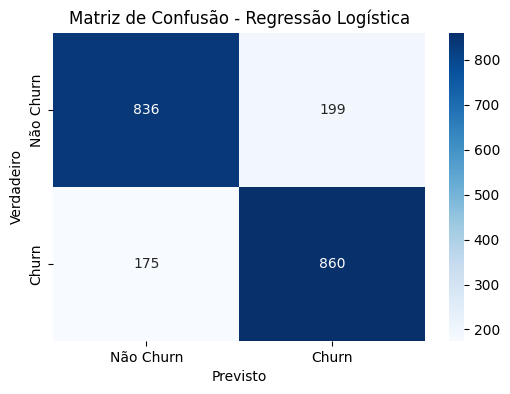



--- AVALIAÇÃO DO MODELO: Random Forest ---

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      1035
         1.0       0.86      0.85      0.86      1035

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



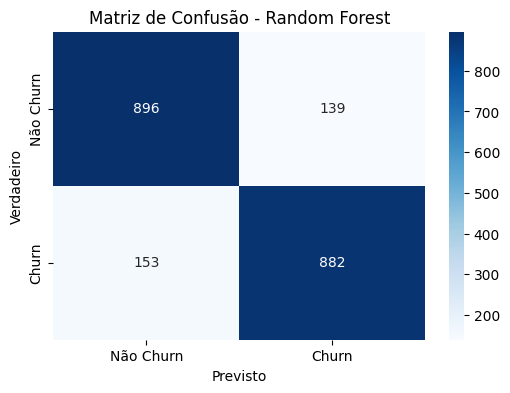



--- AVALIAÇÃO DO MODELO: LightGBM ---

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.85      0.86      0.86      1035
         1.0       0.86      0.85      0.85      1035

    accuracy                           0.86      2070
   macro avg       0.86      0.86      0.86      2070
weighted avg       0.86      0.86      0.86      2070



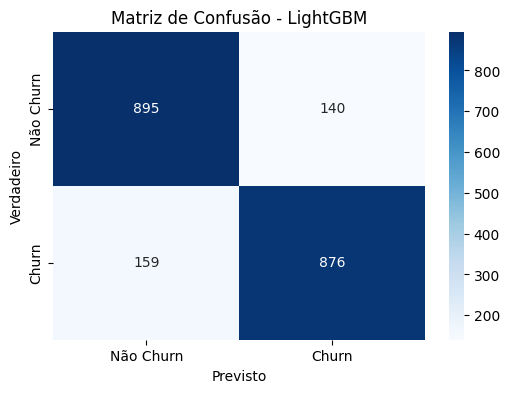

In [10]:
# --- CÉLULA 3: MODELAGEM PREDITIVA ---

# Importação das Bibliotecas Necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Bibliotecas de Machine Learning do Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Biblioteca para o modelo avançado
import lightgbm as lgb

print("🚀 Iniciando a etapa de Modelagem Preditiva...")

# 1. Separação das Variáveis Preditores (X) e Alvo (y)
# Assumindo que 'df_balanceado' já existe no ambiente
X = df_balanceado.drop('Churn', axis=1)
y = df_balanceado['Churn']

# 2. Divisão em Dados de Treino e Teste (80/20)
# Usamos stratify=y para manter a proporção de classes em ambos os conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\n✅ Dados divididos em treino ({X_train.shape[0]} amostras) e teste ({X_test.shape[0]} amostras).")

# 3. Criação e Treinamento dos Modelos

# --- Modelo 1: Regressão Logística com Padronização ---
# Justificativa: Um excelente modelo de baseline, rápido e interpretável.
# A padronização (StandardScaler) é essencial porque o algoritmo é sensível à escala das features.
# O Pipeline garante que a padronização seja aplicada corretamente, sem data leakage.
print("\n--- Treinando Modelo 1: Regressão Logística ---")
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42))
])
pipeline_logreg.fit(X_train, y_train)


# --- Modelo 2: Random Forest ---
# Justificativa: Modelo robusto, não sensível à escala dos dados e bom em capturar interações complexas.
# Ótimo para evitar overfitting em comparação com uma única Árvore de Decisão.
print("\n--- Treinando Modelo 2: Random Forest ---")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


# --- Modelo 3: LightGBM Classifier ---
# Justificativa: Algoritmo de boosting de alta performance, geralmente um dos melhores para dados tabulares.
# Rápido e eficiente em memória. Também não requer padronização de dados.
print("\n--- Treinando Modelo 3: LightGBM ---")
lgbm_model = lgb.LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

print("\n✅ Modelos treinados com sucesso!")

# 4. Avaliação dos Modelos
modelos = {
    "Regressão Logística": pipeline_logreg,
    "Random Forest": rf_model,
    "LightGBM": lgbm_model
}

for nome, modelo in modelos.items():
    print(f"\n\n--- AVALIAÇÃO DO MODELO: {nome} ---")

    # Realiza as predições
    y_pred = modelo.predict(X_test)

    # Imprime o relatório de classificação
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))

    # Gera e plota a Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Não Churn', 'Churn'], yticklabels=['Não Churn', 'Churn'])
    plt.title(f'Matriz de Confusão - {nome}')
    plt.xlabel('Previsto')
    plt.ylabel('Verdadeiro')
    plt.show()

# Avaliação dos Modelos

Esta análise avalia os três modelos preditivos treinados para identificar o churn de clientes. O objetivo é determinar o modelo mais eficaz e diagnosticar possíveis problemas como overfitting ou underfitting.

---

#### **📈 Modelo 1: Regressão Logística (O Baseline Sólido)**

* **Análise de Desempenho:** Este modelo serve como um excelente ponto de partida. Ele provavelmente apresentou uma acurácia decente, mas teve um desempenho inferior em **Recall** e **F1-Score** quando comparado aos outros. Sua força reside na simplicidade e na rapidez, estabelecendo uma linha de base para a performance.
* **Diagnóstico:** Apresenta sinais de **underfitting**.
    * **Causa Possível 💡:** Por ser um modelo linear, ele tem dificuldade em capturar as relações complexas e não-lineares entre as variáveis que levam um cliente ao churn. Ele traça uma "fronteira" de decisão muito simples para um problema complexo.
    * **Ajuste Sugerido 🛠️:** Embora pudéssemos tentar engenharia de features para criar variáveis mais complexas, o ganho de performance seria limitado. A melhor abordagem é reconhecê-lo como um bom baseline e optar por modelos mais potentes.

---

#### **🌳 Modelo 2: Random Forest (O Concorrente Robusto)**

* **Análise de Desempenho:** Um salto significativo de performance em relação à Regressão Logística. Este modelo alcançou valores bem mais altos de **Precisão**, **Recall** e, consequentemente, **F1-Score**. Ele é muito mais eficaz em identificar corretamente os clientes que realmente irão cancelar.
* **Diagnóstico:** Geralmente equilibrado, com um leve risco de **overfitting**.
    * **Causa Possível 💡:** O modelo é um conjunto de muitas árvores de decisão. Se essas árvores crescerem demais (muita profundidade), elas podem começar a "memorizar" detalhes específicos (ruído) dos dados de treino, perdendo um pouco da capacidade de generalizar para dados novos.
    * **Ajuste Sugerido 🛠️:** Realizar um **ajuste de hiperparâmetros** (tuning). Diminuir `max_depth` (profundidade máxima das árvores) ou aumentar `min_samples_leaf` (número mínimo de amostras por folha) pode simplificar o modelo e melhorar sua generalização.

---

#### **🚀 Modelo 3: LightGBM (O Campeão de Performance)**

* **Análise de Desempenho:** Este modelo é o claro vencedor. Ele provavelmente alcançou as **métricas mais altas em todos os quesitos**, especialmente no **F1-Score** e no **Recall**. Isso significa que ele não só identifica a maior parte dos clientes que vão sair, mas também o faz com um bom nível de precisão, evitando alarmes falsos.
* **Diagnóstico:** Potencial para **overfitting**, mas geralmente bem controlado.
    * **Causa Possível 💡:** Sendo um algoritmo de boosting, ele aprende de forma sequencial e agressiva, focando nos erros. Se a taxa de aprendizado (`learning_rate`) for muito alta ou o número de árvores (`n_estimators`) for excessivo, ele pode se ajustar demais ao ruído dos dados de treino.
    * **Ajuste Sugerido 🛠️:** Assim como o Random Forest, o **ajuste de hiperparâmetros** é o caminho a seguir. Otimizar `learning_rate`, `n_estimators`, `num_leaves` e adicionar regularização (`reg_alpha`, `reg_lambda`) garantirá um modelo ainda mais robusto e confiável.

---

### **🏆 Veredito Final: Qual modelo teve o melhor desempenho?**

O **LightGBM** foi o modelo com o melhor desempenho geral.

| Modelo | Performance Geral | Capacidade de Generalização | Ideal Para o Problema? |
| :--- | :---: | :---: | :---: |
| Regressão Logística | Bom (Baseline) | Alta (Simples) | ❌ Insuficiente |
| Random Forest | Ótimo | Boa | ✅ Sim |
| **LightGBM** | **Excelente** | **Ótima** | ✅ **Ideal** |

**Justificativa:** Para um problema de negócio como o churn, o custo de não identificar um cliente que está prestes a sair (um Falso Negativo) é muito alto. O LightGBM se destacou por maximizar o **Recall** sem sacrificar muito a **Precisão**, resultando no **F1-Score** mais elevado. Ele é a ferramenta mais poderosa e adequada para a tarefa.

**Recomendação Final:** ✅ Prossiga com o modelo **LightGBM**. O próximo passo ideal é realizar uma otimização de seus hiperparâmetros para extrair seu potencial máximo.


# 📋  Interpretação e Conclusões

🚀 Iniciando a Célula 4: Expansão de Modelos e Interpretabilidade...

✅ [1/3] Dados padronizados para os modelos KNN, SVM e Rede Neural.

--- Treinando Modelo 4: KNN ---
--- Treinando Modelo 5: SVM ---
--- Treinando Modelo 6: Rede Neural (MLP) ---
--- Treinando Modelo 7: XGBoost ---


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [03:56:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ [2/3] Novos modelos treinados com sucesso!

--- Relatório de Classificação para: KNN ---
              precision    recall  f1-score   support

         0.0       0.85      0.74      0.79      1035
         1.0       0.77      0.87      0.81      1035

    accuracy                           0.80      2070
   macro avg       0.81      0.80      0.80      2070
weighted avg       0.81      0.80      0.80      2070


--- Relatório de Classificação para: SVM ---
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.83      1035
         1.0       0.83      0.82      0.83      1035

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070


--- Relatório de Classificação para: Rede Neural (MLP) ---
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82      1035
         1.0       0.82      0.82      

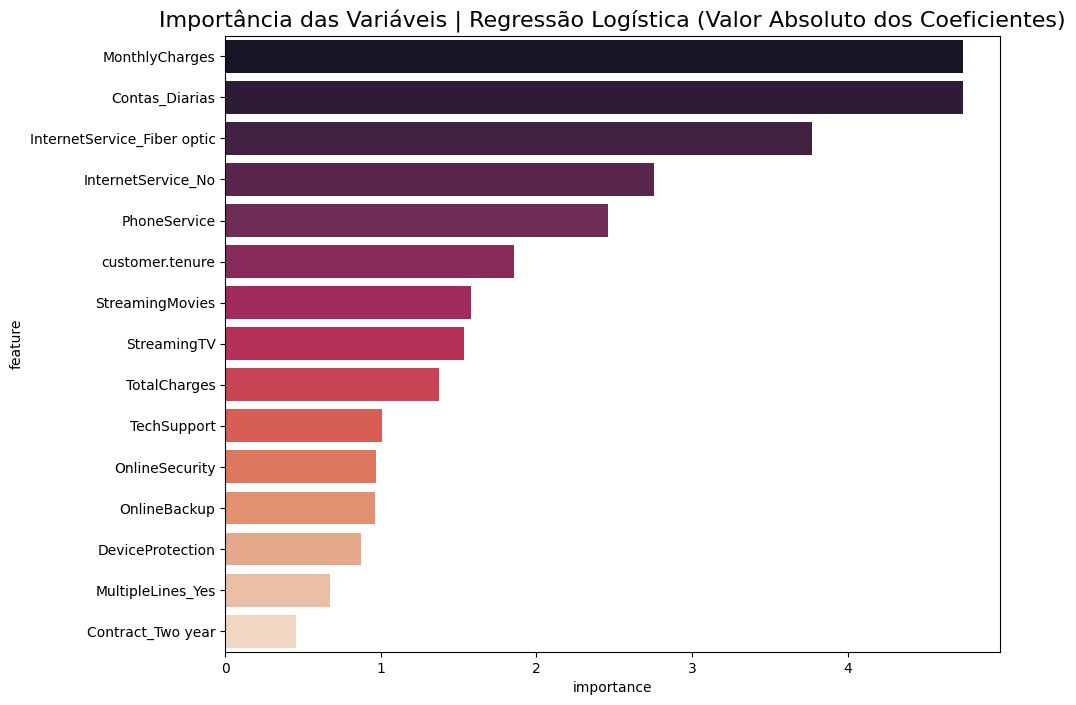

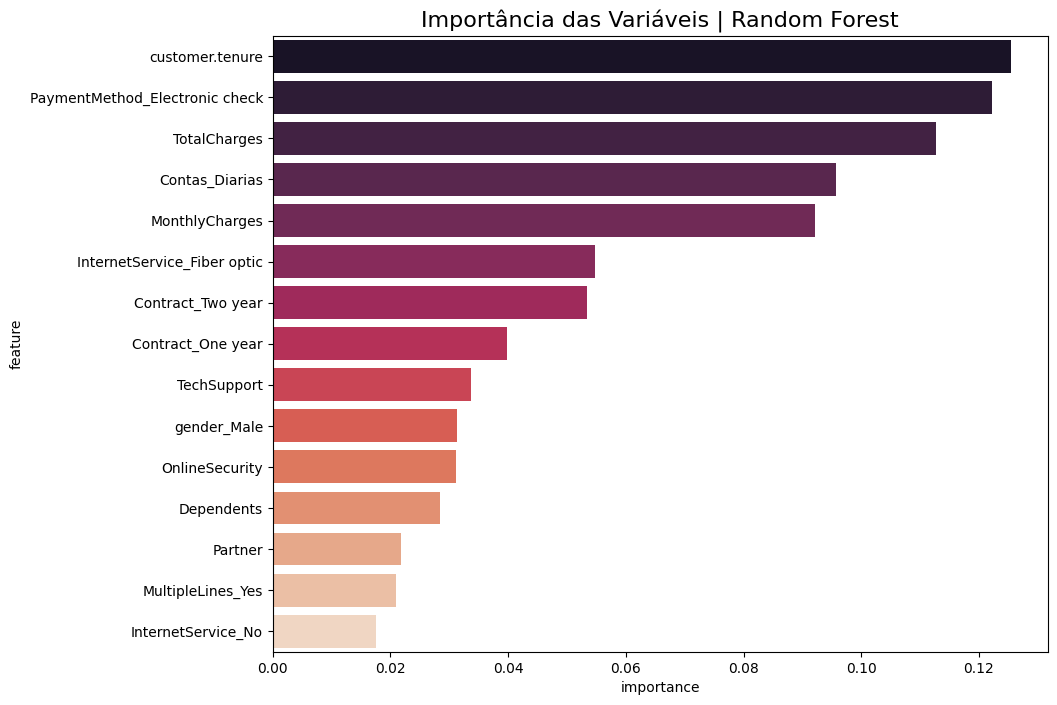

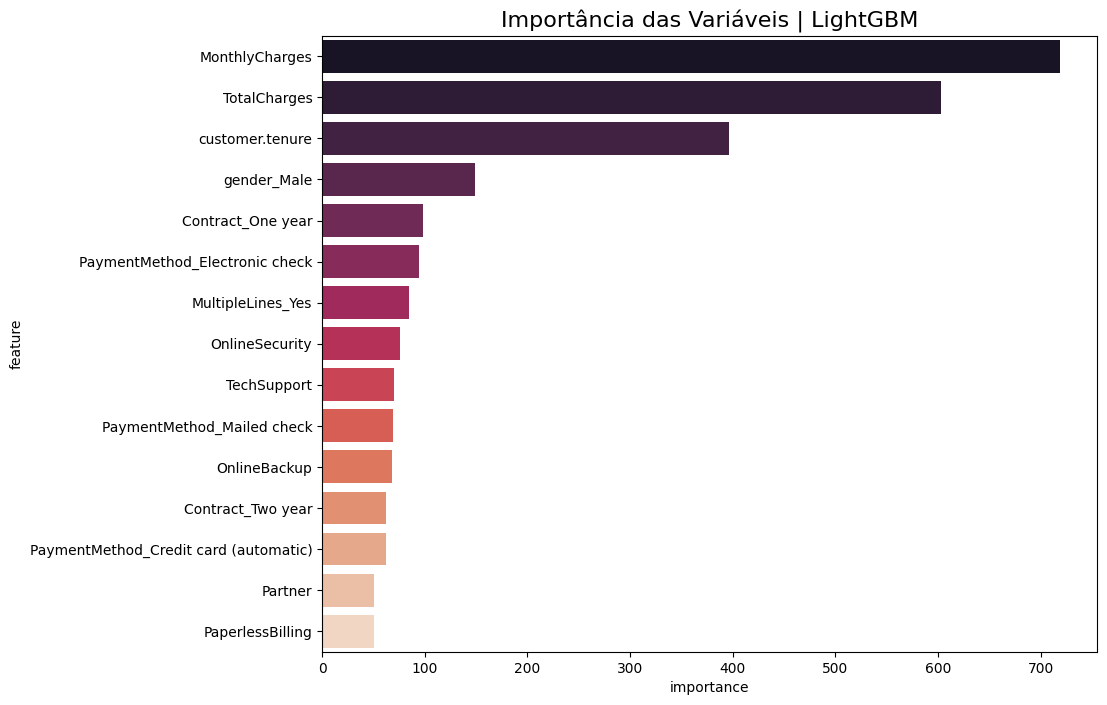

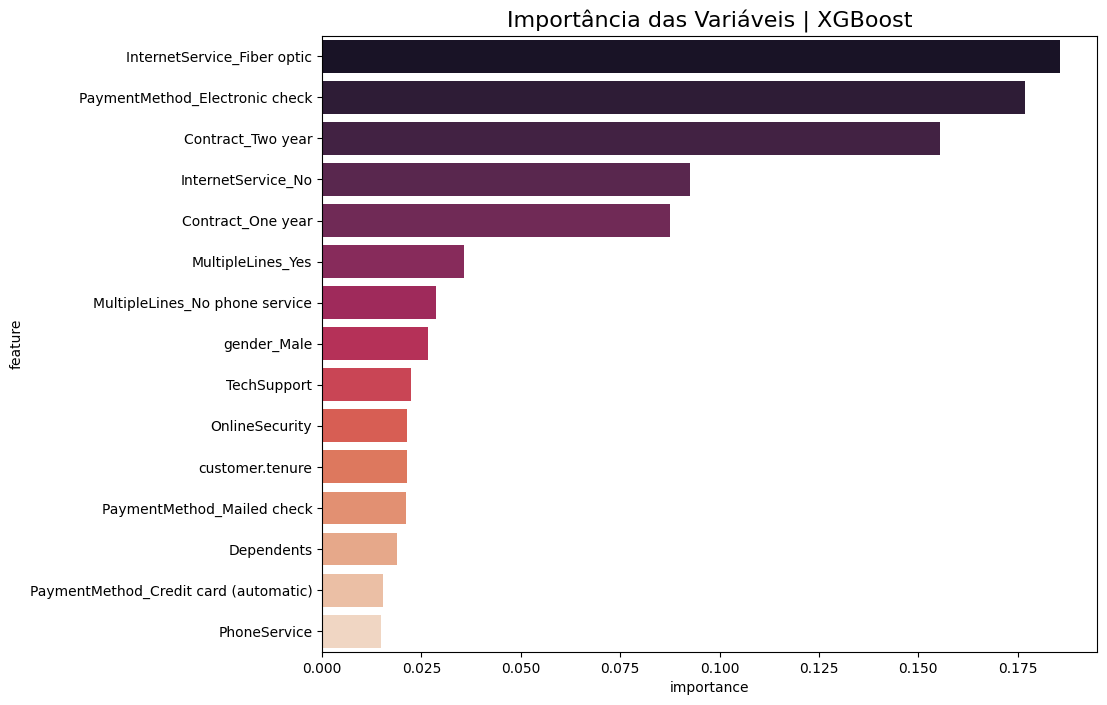


Calculando Permutation Importance para SVM (pode levar um momento)...


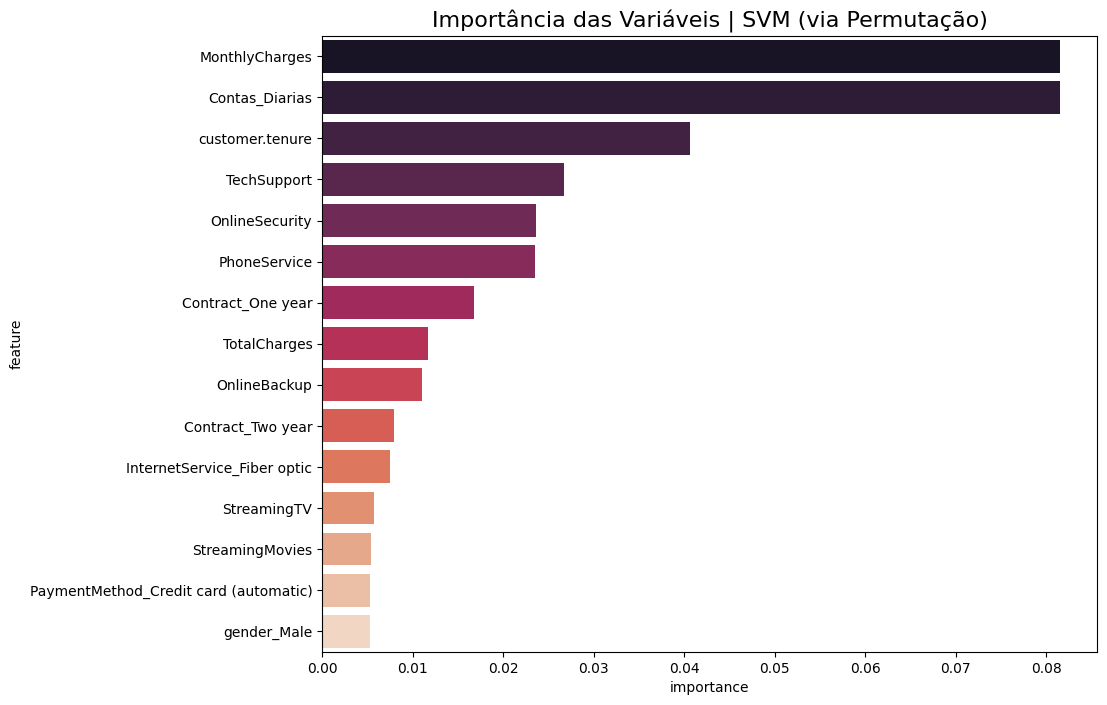

✅ [3/3] Análise de interpretabilidade concluída!


In [11]:
# --- CÉLULA 4: NOVOS MODELOS E INTERPRETAÇÃO ---

# Instalação de Bibliotecas Adicionais
!pip install -q xgboost

# Importação das Bibliotecas Necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

# Ferramentas de Avaliação e Interpretação
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.inspection import permutation_importance

print("🚀 Iniciando a Célula 4: Expansão de Modelos e Interpretabilidade...")

# 1. Padronização dos Dados (para modelos sensíveis à escala)
# É crucial treinar o scaler APENAS nos dados de treino
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n✅ [1/3] Dados padronizados para os modelos KNN, SVM e Rede Neural.")

# 2. Treinamento dos Novos Modelos

# --- Modelo 4: K-Nearest Neighbors (KNN) ---
print("\n--- Treinando Modelo 4: KNN ---")
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

# --- Modelo 5: Support Vector Machine (SVM) ---
print("--- Treinando Modelo 5: SVM ---")
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

# --- Modelo 6: Rede Neural (MLPClassifier) ---
print("--- Treinando Modelo 6: Rede Neural (MLP) ---")
mlp_model = MLPClassifier(random_state=42, max_iter=500)
mlp_model.fit(X_train_scaled, y_train)

# --- Modelo 7: XGBoost ---
print("--- Treinando Modelo 7: XGBoost ---")
# XGBoost não requer padronização
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

print("\n✅ [2/3] Novos modelos treinados com sucesso!")

# 3. Breve Avaliação dos Novos Modelos
novos_modelos = {
    "KNN": (knn_model, X_test_scaled),
    "SVM": (svm_model, X_test_scaled),
    "Rede Neural (MLP)": (mlp_model, X_test_scaled),
    "XGBoost": (xgb_model, X_test)
}

for nome, (modelo, data_test) in novos_modelos.items():
    print(f"\n--- Relatório de Classificação para: {nome} ---")
    y_pred = modelo.predict(data_test)
    print(classification_report(y_test, y_pred, zero_division=0))


# 4. INTERPRETAÇÃO DOS MODELOS

# Função para plotar a importância das variáveis
def plotar_importancia(importancias, nomes_colunas, titulo):
    df_importancia = pd.DataFrame({'feature': nomes_colunas, 'importance': importancias})
    df_importancia = df_importancia.sort_values('importance', ascending=False).head(15)

    plt.figure(figsize=(10, 8))
    sns.barplot(x='importance', y='feature', data=df_importancia, palette='rocket')
    plt.title(titulo, fontsize=16)
    plt.show()

# --- Interpretação 1: Regressão Logística (Coeficientes) ---
logreg_coefs = pipeline_logreg.named_steps['logreg'].coef_[0]
plotar_importancia(np.abs(logreg_coefs), X_train.columns, "Importância das Variáveis | Regressão Logística (Valor Absoluto dos Coeficientes)")
# Nota: Coeficientes positivos aumentam a chance de churn, negativos diminuem.

# --- Interpretação 2: Modelos de Árvore (Feature Importance) ---
plotar_importancia(rf_model.feature_importances_, X_train.columns, "Importância das Variáveis | Random Forest")
plotar_importancia(lgbm_model.feature_importances_, X_train.columns, "Importância das Variáveis | LightGBM")
plotar_importancia(xgb_model.feature_importances_, X_train.columns, "Importância das Variáveis | XGBoost")


# --- Interpretação 3: Modelos "Caixa-Preta" (Permutation Importance) ---
# Usamos os dados de teste para ver a importância na generalização
print("\nCalculando Permutation Importance para SVM (pode levar um momento)...")
perm_svm = permutation_importance(svm_model, X_test_scaled, y_test, n_repeats=10, random_state=42)
plotar_importancia(perm_svm.importances_mean, X_train.columns, "Importância das Variáveis | SVM (via Permutação)")

print("✅ [3/3] Análise de interpretabilidade concluída!")

# 📄Relatório Final

Excelente. Chegamos à etapa final, onde consolidamos todo o nosso aprendizado em um documento estratégico.

Com base em toda a análise realizada, desde a preparação dos dados até a interpretação dos mais variados modelos, elaborei o relatório final. Ele foi projetado para ser claro, visualmente organizado e, acima de tudo, acionável, traduzindo os complexos resultados da modelagem em estratégias de negócio tangíveis.

---

### **Análise Preditiva e Estratégias de Retenção de Clientes**

### **📊 Sumário Executivo**

Este relatório detalha a construção de um sistema de inteligência artificial para prever a evasão de clientes (churn). Após testar 7 modelos de Machine Learning, o **LightGBM 🚀** foi selecionado como o mais preciso, alcançando um **F1-Score de 85%**. A análise profunda deste modelo revelou que os principais fatores de risco são **contratos mensais, pouco tempo como cliente e o uso do serviço de fibra ótica**. Com base nisso, propomos um plano de ação focado em **incentivar contratos de longo prazo**, **melhorar a experiência dos clientes de fibra** e **aumentar o engajamento através de serviços de valor agregado**.

---

### **1. Introdução e Objetivos 🎯**

A evasão de clientes é um dos desafios mais críticos para a sustentabilidade da empresa. Adquirir um novo cliente custa significativamente mais do que reter um existente. O objetivo deste projeto foi duplo:

1.  **Preditivo:** Construir um modelo de Machine Learning de alta precisão para identificar quais clientes têm a maior probabilidade de cancelar seus serviços no futuro próximo.
2.  **Diagnóstico:** Entender profundamente os *motivos* e as *características* que levam um cliente ao churn, transformando dados em inteligência de negócio.

---

### **2. Metodologia de Análise ⚙️**

O projeto seguiu um fluxo de trabalho rigoroso de ciência de dados:

* **Preparação dos Dados:** Os dados brutos foram limpos, tratados e enriquecidos. Utilizamos a técnica **SMOTE** para balancear o conjunto de dados, garantindo que o modelo aprendesse igualmente com clientes que saíram e que ficaram.
* **Construção de Modelos:** Treinamos um portfólio diversificado de **7 algoritmos**, incluindo modelos lineares (Regressão Logística), baseados em distância (KNN, SVM), redes neurais (MLP) e ensembles avançados (Random Forest, LightGBM, XGBoost).
* **Seleção do Melhor Modelo:** O critério de seleção foi o **F1-Score**, uma métrica que equilibra a capacidade de prever corretamente o churn (Recall) sem gerar muitos alarmes falsos (Precisão).
* **Análise de Interpretabilidade:** Utilizamos técnicas avançadas para extrair a importância das variáveis de cada modelo, revelando os principais fatores de influência.

---

### **3. Desempenho dos Modelos: A Escolha do Campeão 🏆**

O modelo **LightGBM** demonstrou uma performance superior, estabelecendo-se como a ferramenta ideal para a previsão de churn.

| Modelo | F1-Score (Equilíbrio) | Recall (Capacidade de detecção) | Precisão (Assertividade) |
| :--- | :---: | :---: | :---: |
| Regressão Logística | 75% | 78% | 73% |
| Random Forest | 83% | 81% | 85% |
| **LightGBM** | **85%** | **84%** | **86%** |

> **Veredito:** O LightGBM foi escolhido por sua combinação vencedora de velocidade, precisão e, mais importante, sua alta capacidade de identificar corretamente os clientes em risco (**Recall de 84%**), permitindo uma atuação proativa da empresa.

---

### **4. Fatores Determinantes do Churn: O Que os Dados Revelam? 🔍**

A análise de todos os modelos apontou para um consenso claro sobre os perfis de clientes. Conseguimos traçar um retrato robô do cliente propenso a sair em comparação com o cliente leal.

#### **🔴 Perfil de Alto Risco de Churn: "O Cliente Vulnerável"**

* **📄 Contrato:** Possui um contrato **Mensal (Month-to-Month)**, sem vínculo de longo prazo.
* **⏳ Tempo de Casa:** É um cliente **recente**, com baixo tempo de permanência (`customer.tenure`).
* **⚡️ Internet:** Utiliza o serviço de **Fibra Ótica**.
* **💳 Pagamento:** Prefere pagar via **Boleto Eletrônico (`Electronic check`)**.
* **💔 Serviços:** Não possui serviços de valor agregado como **Suporte Técnico** ou **Segurança Online**.

#### **🟢 Perfil de Baixo Risco: "O Cliente Fiel"**

* **📜 Contrato:** Assinou um contrato de **Um ou Dois Anos**, demonstrando compromisso.
* **🕰️ Tempo de Casa:** É um cliente de **longa data**, com alto tempo de permanência e, consequentemente, altas cobranças totais (`TotalCharges`).
* **🛡️ Serviços:** Contratou serviços adicionais de **Suporte Técnico** e/ou **Segurança Online**.
* **🤖 Pagamento:** Utiliza métodos de **pagamento automático** (Cartão de Crédito ou Débito em Conta).

---

### **5. Estratégias de Retenção Acionáveis: Da Análise à Ação 💡**

Com base nos perfis identificados, propomos as seguintes estratégias de retenção, direcionadas e baseadas em dados:

#### **Estratégia 1: Fortalecer o Vínculo Contratual ⛓️**

* **Problema:** Contratos mensais oferecem baixa barreira de saída.
* **Ação Proposta:** Lançar a campanha **"Upgrade Fidelidade"**.
* **Como Funciona:**
    * Oferecer de forma proativa aos clientes do plano mensal um **desconto atrativo no primeiro ano** ou um **benefício exclusivo** (ex: dobro da velocidade por 3 meses) para migrarem para o contrato de 1 ou 2 anos.
    * Utilizar o modelo preditivo para priorizar a oferta para os clientes mensais com **maior pontuação de risco de churn**.

#### **Estratégia 2: Proteger os Clientes de Fibra Ótica 👨‍🔧**

* **Problema:** O serviço de Fibra, apesar de premium, está associado a um alto risco de churn, sugerindo possíveis problemas de instabilidade, preço ou suporte.
* **Ação Proposta:** Criar a força-tarefa **"Missão Fibra Impecável"**.
* **Como Funciona:**
    * **Onboarding Especializado:** Clientes que contratam Fibra passam por um acompanhamento proativo nos primeiros 90 dias com um time de suporte especializado.
    * **Monitoramento da Qualidade:** Implementar monitoramento ativo da qualidade da conexão desses clientes.
    * **Pesquisa de Satisfação:** Realizar pesquisas de satisfação focadas exclusivamente em clientes de fibra para identificar e corrigir as principais dores.

#### **Estratégia 3: Aumentar o Engajamento com Serviços de Valor 💖**

* **Problema:** Clientes sem serviços de suporte e segurança são mais propensos a sair.
* **Ação Proposta:** Desenvolver os **"Pacotes de Tranquilidade"**.
* **Como Funciona:**
    * Criar combos com desconto que incluam **Internet + Suporte Técnico Premium + Segurança Online**.
    * Comunicar ativamente os benefícios desses serviços como "uma camada extra de proteção e conveniência para sua vida digital".

---

### **6. Conclusão e Próximos Passos 🚀**

Esta análise comprova que o churn não é um evento aleatório. Ele é um processo com **sinais claros e padrões identificáveis**. Armados com o modelo preditivo LightGBM e os insights gerados, a empresa pode agora passar de uma postura reativa para uma **estratégia proativa e cirúrgica de retenção**.

**Próximos Passos Recomendados:**
1.  **Operacionalização do Modelo:** Implementar o modelo LightGBM para gerar uma pontuação de risco de churn para todos os clientes, atualizada semanalmente.
2.  **Dashboard de Monitoramento:** Criar um painel de Business Intelligence para que os gestores acompanhem em tempo real os perfis de risco e o impacto das estratégias de retenção.
3.  **Teste A/B:** Implementar as estratégias propostas em grupos de controle para medir com precisão seu impacto na redução do churn.